# Bayes

In [ ]:
import numpy as np
from collections import defaultdict

class Bayes: 
    def __init__(self):
        self.X_probas = defaultdict(lambda: [0, 0])
    
    def __call__(self, instance):
        return self.predict(instance)
    
    def fit(self, X, y):
        self.p_y = np.sum(y==1) / len(y)
        for instance in X[y==0]:
            key = int("".join(instance.astype(str)), base=2)
            self.X_probas[key][0] += 1
            
        for instance in X[y==1]:
            key = int("".join(instance.astype(str)), base=2)
            self.X_probas[key][1] += 1
    
    def predict(self, instances):
        preds = []
        for instance in instances:
            key = int("".join(instance.astype(str)), base=2)
            preds.append(int(self.X_probas[key][1]*self.p_y > self.X_probas[key][0]*(1-self.p_y)))
        return np.array(preds)

## Bayes Classifier

In [1]:
from Scratch.BayesClassifier import Bayes

In [2]:
from Scratch.helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split(binary_features=True)

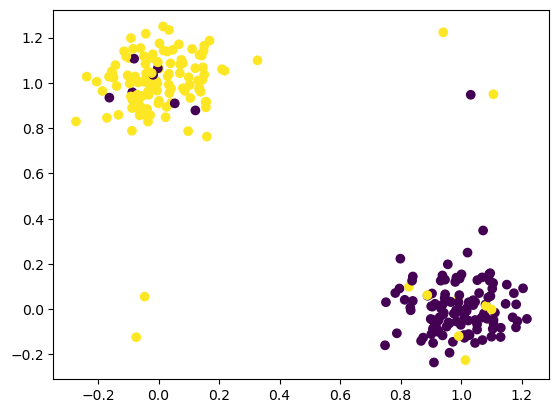

In [3]:
from Scratch.helpers.Exploration import scatter_jitter
scatter_jitter(X_train[:,0], X_train[:,1], c=y_train)

In [4]:
model = Bayes()
model.fit(X_train, y_train)
preds = model(X_test)

In [5]:
from Scratch.helpers.Evaluation import classification_stats
cm_args, metrics = classification_stats(preds, y_test)
metrics

{'acc': 0.8666666666666667, 'precision': 0.875, 'recall': 0.875}

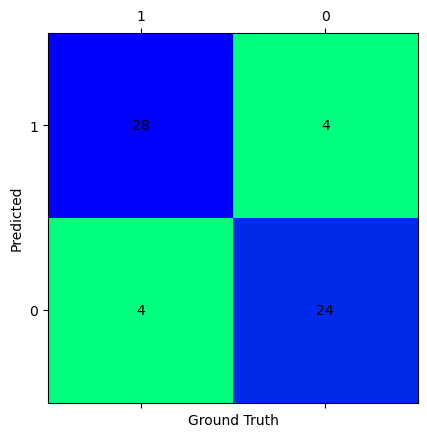

In [6]:
from Scratch.helpers.Evaluation import confusion_matrix
confusion_matrix(*cm_args)